Assigment 2 
CS 579 Class Participant Data Social Network Data collection.xlsx

In [6]:
import pandas as pd 
import ast
import networkx as nx
import matplotlib.pyplot as plt
import re
import string
from networkx.drawing.layout import bipartite_layout
from collections import Counter,defaultdict

In [7]:
# Load data 
df = pd.read_csv("../Input Files/SocialNetworkDataCollection.csv")


# Data cleaning
df.rename(columns={
    "Illinois Tech email address":"student_email",
    "Department (if you have multiple depts please enter them all separated by a comma)": "department",
    "Degree Program (if you are pursuing multiple degrees at Illinois Tech please enter them all separated by a comma)": "degree_program",
    "Neighborhood you reside in": "neighborhood",
    "Computer Languages (separate with comma)": "computer_languages",
    "Languages spoken (separate with comma)": "languages_spoken",
    "Hobbies (separate with comma)": "hobbies",
    "Student club memberships (separate with comma)":"student_club"
}, inplace=True)

df 

,student_email,department,degree_program,neighborhood,computer_languages,languages_spoken,hobbies,student_club
0,mlaiz@illinoistech.edu,Computer Science,"Bachelor's Computer Science, Master's Artifici...",Downtown Skokie,"C, JavaScript, Java, Python","Tagalog, English","Reading, Rock Climbing, Watch Movies, Hang out...",DDAO
1,ionyeka@hawk.illinoistech.edu,Computer Science,Master's Artificial Intelligence,Bronzeville,"C#, Python, React, Angular, SQL","English, German","swimming, movies, football",NaN
2,nsmith40@hawk.illinoistech.edu,Computer Science,Master's Artificial Intelligence,Buena Park,"Python, C++, R, Java, SQLite",English,"reading, weightlifting, movies, leisure walks",NaN
3,cli124@hawk.illinoistech.edu,Computer Science,Master's Artificial Intelligence,"Shanghai, China","Python, R, Java, SQLite","English, Chinese",Watching plays and art exhibitions,NaN
4,imodzgvrishvili@hawk.illinoistech.edu,Computer Science,Master's Artificial Intelligence,"Kensington, Brooklyn","R, Python, SQL, Javascript, React","English, Georgian","Skydiving, Bicycling, Reading, Baking, Listeni...",NaN
...,...,...,...,...,...,...,...,...
93,pdomadia@hawk.illinoistech.edu,Computer Science,Master's Computer Science,"Bronzeville, Chicago","Python, SQL, HTML, CSS, C, C++","English, Hindi, Gujarati, Malayalam, Bengali","Snow Boarding, Go Karting, Bike Rides, Guitar,...","PMEC, IIT Esports, ACM, Volleyball Club"
94,hzhang156@hawk.illinoistech.edu,Computer Science,Master's Artificial Intelligence,"Beijing,China","Python,SQL,C","English, Chinese","Table tennis, Tennis, Volleyball ,Hiking.",NaN
95,fcetin@hawk.illinoistech.edu,Computing,Master's Artificial Intelligence,Lake View East,"Python, Rust, C","English, Turkish, German, Dutch",Rock climbing,"ML@IIT, Rock Climbing @ IIT"
96,xliao6@hawk.illinoistech.edu,Computer Science,Master's Artificial Intelligence,"Shenzhen, China","C++, C, Go, Python, Html, JavaScript","English, Chinese","Gym workouts, Cars, Music, Watching Movies & T...",NaN


Data Cleaning

Department

In [8]:

df["department"] = df["department"].str.replace(", and ", ",", regex=False)

variations = [
    "Computer Science", "Computer science", "College of Computing", 
    "Computer  Science", "Copmuter Science", "Computing"
]

df["department"] = df["department"].apply(lambda dept: [
    "CS" if d.strip() in variations else d.strip() 
    for d in re.sub(r"\s*and\s*", ",", dept).split(",") if d.strip()
])

departments_entities = []
for nodos in df["department"]:
    for nodo in nodos:
        if nodo not in departments_entities:
            departments_entities.append(nodo)



Neighborhood

In [9]:
df["neighborhood"] = df["neighborhood"].str.lower()

def clean_neighborhood(x):
    if "," in x:
        parts = [p.strip() for p in x.split(",")]
        if parts[-1] == "chicago":  
            return parts[0] 
        else:
            return parts[-1]  
    return x

df["neighborhood"] = df["neighborhood"].apply(clean_neighborhood)
df["neighborhood"] = df["neighborhood"].str.title()

# nodes creation
neighborhoods_nodes = []
for neighborhood in df["neighborhood"]:
    if neighborhood not in neighborhoods_nodes:
        neighborhoods_nodes.append(neighborhood)

print(neighborhoods_nodes)



['Downtown Skokie', 'Bronzeville', 'Buena Park', 'China', 'Brooklyn', 'Portage Park', 'Beijing', 'Buffalo Grove', 'The Loop', 'Lincoln Park', 'Bridgeport', 'Arlington Heights', 'Skokie', 'River West', 'Iowa', 'Albany/North Park', 'Saudi Arabia', 'Ukrainian Village', 'Rockford', 'Bolingbrook', 'Schaumburg', 'Armour Square', 'South Loop', 'Downtown Harrison', 'Loop', 'Malaysia', 'Korea', 'Brozeville', 'Brighton Park', 'Lake View East']


Computer Languages

In [10]:


go_variations = ["go", "goland", "golang"]
ty_variations = ["ts", "typescript", "typercript", "typerscript"]
java_variations = ["java", "javascript", "javascipt", "js"]
c_variations = ["c", "c#"]
sql_variations = ["sql","sqlite","mysql"]

df["computer_languages"] = df["computer_languages"].str.replace(r"\s*/\s*", ",", regex=True).str.lower()

df["computer_languages"] = [
    [
        "JavaScript" if (t:=token.strip(string.punctuation + " ")) in java_variations
        else "C" if t in c_variations
        else "SQL" if t in sql_variations
        else "Go" if t in go_variations
        else "TypeScript" if t in ty_variations
        else t.capitalize()
        for token in re.split(r",|\band\b|\?|;", row)
        if (token.strip(string.punctuation + " "))
    ]
    for row in df["computer_languages"]
]


Languages Spoken

In [11]:
english_variations = ["english", "en", "eng"]
tagalog_variations = ["tagalog", "filipino"]
german_variations = ["german", "deutsch", "ger"]
chinese_variations = ["chinese", "mandarin", "zhongwen", "cantonese"]
spanish_variations = ["spanish", "español"]
kannada_variations = ["kannada", "kanada"]
marathi_variations = ["marathi"]
japanese_variations = ["japanese"]

df["languages_spoken"] = df["languages_spoken"].str.lower() \
    .str.replace(r"\s*/\s*", ",", regex=True) \
    .str.replace(r"\s+", " ", regex=True) \
    .str.replace(r"\(.*?\)", "", regex=True)  # Remove parentheses like "(very little)"


df["languages_spoken"] = [
    [
        # Strip spaces and punctuation, then map variations to standard names, capitalize after mapping
        ("English" if (t:=val.strip(string.punctuation + " ")) in english_variations else
         "Tagalog" if t in tagalog_variations else
         "German" if t in german_variations else
         "Chinese" if t in chinese_variations else
         "Spanish" if t in spanish_variations else
         "Kannada" if t in kannada_variations else
         "Marathi" if t in marathi_variations else
         "Japanese" if t in japanese_variations else 
         t.capitalize()) 
        for token in re.split(r",|\band\b|\?|;", row) 
        for val in ([*map(str.strip, token.split("marathi japanese"))] if "marathi japanese" in token else [token])
        if val.strip(string.punctuation + " ")
    ] if pd.notna(row) else []
    for row in df["languages_spoken"]
]

df.to_csv("CleanedDataCollection.csv")


Degree program

In [12]:
# Degree programs
degree_variations = {
    "bachelor's computer science": "Bachelor's in Computer Science",
    "bachelors computer science": "Bachelor's in Computer Science",
    "bsc computer science": "Bachelor's in Computer Science",
    "master's artificial intelligence": "Master's in Artificial Intelligence",
    "masters artificial intelligence": "Master's in Artificial Intelligence",
    "master's computer science": "Master's in Computer Science",
    "msc artificial intelligence": "Master's in Artificial Intelligence",
    "bachelor's artificial intelligence": "Bachelor's in Artificial Intelligence",
    "master's data science": "Master's in Data Science",
    "masters data science": "Master's in Data Science",
    "Master's Science":"Master's in Data Science",
    "Master's Computer Science (software":"Master's in Computer Science"
}


def capitalize_degree(text):
    def cap_word(word):
        if word.lower() == "'s":
            return "'s"
        return word.capitalize()
    return " ".join(cap_word(w) for w in text.split())

def clean_degree_program(row):
    if pd.isna(row):
        return []
    clean_row = re.sub(r"\s*(and|&|,)\s*", ",", row.lower())
    tokens = [t.strip(string.punctuation + " ") for t in clean_row.split(",") if t.strip()]
    cleaned = []
    for token in tokens:
        mapped = degree_variations.get(token, capitalize_degree(token))
        if mapped not in cleaned:
            cleaned.append(mapped)
    return cleaned


df["degree_program"] = df["degree_program"].apply(clean_degree_program)


Hobbies

In [13]:

hobby_groups = {
    "reading": ["reading", "books","Comics","Marvel Comics","Novels", "book reading", "reading and writing","Sci-Fi Books", "Reading Books"],
    "movies": [
        "movie", "movies", "watch movie", "watch movies", "watching movie",
        "watching movies", "movie & tv series", "movies and series","Watching Plays",
        "movies n series", "watching series", "series", "tv", "tv series","Watching Psychological Documentaries"
        "web series","documentary","Kdrama","documentaries","psychological documentaries","Superhero Movies", "Superhero/Horror Movies","Watching Movies & Tv Series","Watching Documentaries"
    ],
    "music": ["music","Listening To Rock Music", "Record Covers","listening to music", "singing", "play music", "playing music","Music","Composing Songs","Guitar"],
    "gaming": ["games", "gaming", "video games", "playing games","Arcade","Gamming","Playing Video Games"],
    "sports": ["sports","Pingpang Ball","Snow Boarding", "Go Karting","Bike Rides","Esports","Gym Workouts","Playing Badmintion","Jogging","Fishing'","Squash","Jiu Jitsu","football", "soccer", "basketball", "cricket", "tennis", "adventure sports", "motorsports", "Rock Climbing","Swimming","Weightlifting","Skydiving","Bicycling","Bicylcing","Hiking","Running","Cars", "Bikes", "Badminton", "Cycling", "Surfing","Track & Field","Boxing","Strength Training","Racing Sports","Table Tennis","Pickleball","Volley Ball","Bowling","Gym","Triathlon","Biking","Formula 1","Scuba Diving","F1","Playing Badminton", "Playing Padel","Playing Cricket","Skiing","Volleyball"],
    "traveling": ["traveling", "travelling", "travel","Travelling Globally"],
    "hiking": ["hiking", "walking", "nature walks","Trekking","Leisure Walks"],
    "anime":["Anime","Animes","Anime Watching","Manga"],
    "cooking":["Baking","Cooking","Cooking Food"],
    "writting":["Writing Poems","Writing Novels","Writting","Story Writing"],
    "photography":["Video Editing", "Photo Editing", "Film Photography","Photo Shooting"]
}

hobby_canon_map = {}
for canon, variants in hobby_groups.items():
    for v in variants:
        hobby_canon_map[v.lower()] = canon.title()

def clean_hobbies(text):
    if pd.isna(text) or not text.strip():
        return []
   
    text = re.sub(r"\S+@\S+", "", text)
    text = re.sub(r"@\S+", "", text)

    text = re.sub(r"\(.*?\)", "", text)

    parts = re.split(r",|\band\b", text.lower())
    cleaned = []
    for part in parts:
        h = part.strip(string.punctuation + " ")
        if not h:
            continue
        
        mapped = hobby_canon_map.get(h, h.title())
        if mapped not in cleaned:
            cleaned.append(mapped)
    return cleaned


df["hobbies"] = df["hobbies"].apply(clean_hobbies)


Student clubs

In [14]:
# Clubs 

def clean_multiple_entries(text):
    if pd.isna(text) or not text.strip():
        return []
    
    text = re.sub(r"@\S*", "", text)
    text = re.sub(r"\(.*?\)", "", text)
    parts = re.split(r",|\band\b", text)

    cleaned = []
    for part in parts:
        p = part.strip(string.punctuation + " ")
        if p and p not in cleaned:
            cleaned.append(p.capitalize())
    return cleaned

# Apply to hobbies or a similar multi-entry column
df["student_club"] = df["student_club"].apply(clean_multiple_entries)
df.to_csv("CleanedDataCollection.csv")


Graph creation

In [15]:
G = nx.Graph()

# Add student nodes
students = df["student_email"]
G.add_nodes_from(students, type="student")

In [16]:
# Departments nodes creation
# Department edges 

G.add_nodes_from(departments_entities, type="department")
departments_edges = []

for _, row in df.iterrows():
    student = row["student_email"]
    for dept in row["department"]:
        departments_edges.append((student, dept))

G.add_edges_from(departments_edges)

In [17]:
# Neighborhoods nodes creation
neighborhoods_nodes = []
for neighborhood in df["neighborhood"]:
    if neighborhood not in neighborhoods_nodes:
        neighborhoods_nodes.append(neighborhood)
neighborhoods_nodes


# edges 
G.add_nodes_from(neighborhoods_nodes, type="neighborhood")
neighborhoods_edges = []

for _, row in df.iterrows():
    student = row["student_email"]
    neighborhoods = [d.strip() for d in str(row["neighborhood"]).split(",")]
    for n in neighborhoods:
        neighborhoods_edges.append((student, n))
print(neighborhoods_edges)
G.add_edges_from(neighborhoods_edges)


[('mlaiz@illinoistech.edu', 'Downtown Skokie'), ('ionyeka@hawk.illinoistech.edu', 'Bronzeville'), ('nsmith40@hawk.illinoistech.edu', 'Buena Park'), ('cli124@hawk.illinoistech.edu', 'China'), ('imodzgvrishvili@hawk.illinoistech.edu', 'Brooklyn'), ('yfan36@hawk.illinoistech.edu', 'China'), ('kszczepankiewicz@hawk.illinoistech.edu', 'Portage Park'), ('zli220@hawk.illinoistech.edu', 'China'), ('hmeng6@hawk.illinoistech.edu', 'Beijing'), ('fmohammed6@hawk.illinoistech.edu', 'Bronzeville'), ('msiva@hawk.illinoistech.edu', 'Bronzeville'), ('pkuchibhotla@hawk.illinoistech.edu', 'Buffalo Grove'), ('kgopal3@hawk.illinoistech.edu', 'Bronzeville'), ('sgauthier@hawk.illinoistech.edu', 'The Loop'), ('amonsorodriguez@hawk.illinoistech.edu', 'Lincoln Park'), ('wkang10@hawk.illinoistech.edu', 'China'), ('abhadre@hawk.illinoistech.edu ', 'Bronzeville'), ('cgurjar@hawk.illinoistech.edu', 'Bronzeville'), ('rladdha@hawk.illinoistech.edu', 'Bronzeville'), ('mwatson12@hawk.illinoistech.edu', 'Bridgeport'), (

In [18]:
# Computer languages nodes

#nodes 
compt_lan_nodes = []
for node_list in df["computer_languages"]:
    for node in node_list:
        if node not in compt_lan_nodes:
            compt_lan_nodes.append(node)

all_nodes = sorted(df["computer_languages"].explode().unique())

#edges
G.add_nodes_from(compt_lan_nodes, type="computer_languages")
computer_langs_edges = []

for _, row in df.iterrows():
    student = row["student_email"]
    for langs in row["computer_languages"]:
        computer_langs_edges.append((student, langs))

G.add_edges_from(computer_langs_edges)


In [19]:
# Spoken languages nodes

#nodes 
spk_lan_nodes = []
all_nodes = []
for node_list in df["languages_spoken"]:
    for node in node_list:
        if node not in spk_lan_nodes:
            spk_lan_nodes.append(node)

all_spoken_nodes = df["languages_spoken"].explode().dropna().unique().tolist()
print(all_spoken_nodes)

# #edges
G.add_nodes_from(spk_lan_nodes, type="languages_spoken")
spk_lan_edges = []

for _, row in df.iterrows():
    student = row["student_email"]
    for langs in row["languages_spoken"]:
        spk_lan_edges.append((student, langs))

G.add_edges_from(spk_lan_edges)

['Tagalog', 'English', 'German', 'Chinese', 'Georgian', 'Polish', 'Hindi', 'Arabic', 'Telugu', 'Urdu', 'Tamil', 'Spanish', 'French', 'Catalan', 'Marathi', 'Kannada', 'Konkani', 'Malayalam', 'Gujarati', 'Japanese', 'Bengali', 'Pashto', 'Indonesian', 'Twi', 'Marwari', 'Burmese', 'Portuguese', 'Turkish', 'Dutch']


In [20]:
# Degree programs

#nodes 
degree_nodes = []

for node_list in df["degree_program"]:
    for node in node_list:
        if node not in degree_nodes:
            degree_nodes.append(node)

all_degree_nodes = df["degree_program"].explode().dropna().unique().tolist()
print(all_degree_nodes)

# #edges
G.add_nodes_from(degree_nodes, type="degree_program")
spk_lan_edges = []

for _, row in df.iterrows():
    student = row["student_email"]
    for langs in row["degree_program"]:
        spk_lan_edges.append((student, langs))

G.add_edges_from(spk_lan_edges)

["Bachelor's in Computer Science", "Master's in Artificial Intelligence", "Master's in Computer Science", "Bachelor's in Artificial Intelligence", "Master's in Data Science", "Master's Cybersecurity", "Master's Science", "Master's Cdsor", "Master's Computer Science (software", 'Ph.d. Civil Engineering']


In [21]:
# Degree programs

#nodes 
clubs_nodes = []

for node_list in df["student_club"]:
    for node in node_list:
        if node not in clubs_nodes:
            clubs_nodes.append(node)

all_clubs_nodes = df["student_club"].explode().dropna().unique().tolist()
print(all_clubs_nodes)

# #edges
G.add_nodes_from(clubs_nodes, type="student_club")
clubs_edges = []

for _, row in df.iterrows():
    student = row["student_email"]
    for club in row["student_club"]:
        clubs_edges.append((student, club))

G.add_edges_from(clubs_edges)
print(clubs_edges)

['Ddao', 'Psa', 'Msa', 'Acm', 'Iit soccer club', 'Pmec', 'Iit volley ball club', 'Tedxillinois tech club', 'Google developers club', 'Iit igem club', 'Ml club', 'Webster big data association', 'Na', 'Isa', 'Iit esports', 'Volleyball club', 'Ml rock climbing  iit']
[('mlaiz@illinoistech.edu', 'Ddao'), ('kszczepankiewicz@hawk.illinoistech.edu', 'Ddao'), ('fmohammed6@hawk.illinoistech.edu', 'Psa'), ('fmohammed6@hawk.illinoistech.edu', 'Msa'), ('kgopal3@hawk.illinoistech.edu', 'Acm'), ('kgopal3@hawk.illinoistech.edu', 'Iit soccer club'), ('abhadre@hawk.illinoistech.edu ', 'Pmec'), ('mwatson12@hawk.illinoistech.edu', 'Iit soccer club'), ('asyed8@hawk.illinoistech.edu', 'Iit volley ball club'), ('awavdhane@hawk.illinoistech.edu', 'Tedxillinois tech club'), ('adani2@hawk.illinoistech.edu', 'Google developers club'), ('ajain105@hawk.illinoistech.edu', 'Iit igem club'), ('asamuel5@hawk.illinoistech.edu', 'Ml club'), ('asamuel5@hawk.illinoistech.edu', 'Acm'), ('zliu127@hawk.illinoistech.edu', 'W

In [22]:
# Hobbies 

#nodes 
hobbies_nodes = []

for node_list in df["hobbies"]:
    for node in node_list:
        if node not in hobbies_nodes:
            hobbies_nodes.append(node)

all_hobbies_nodes = df["hobbies"].explode().dropna().unique().tolist()
print(all_hobbies_nodes)

# #edges
G.add_nodes_from(hobbies_nodes, type="hobbies")
hobbies_edges = []

for _, row in df.iterrows():
    student = row["student_email"]
    for hobbie in row["hobbies"]:
        hobbies_edges.append((student, hobbie))

G.add_edges_from(hobbies_edges)
print(hobbies_edges)

['Reading', 'Sports', 'Movies', 'Hang Out With Friends', 'Hiking', 'Art Exhibitions', 'Cooking', 'Music', 'Puppy', 'Learning', 'Piano', 'Investing', 'Journalling', 'Anime', 'Traveling', 'Engineering', 'Science', 'Math', 'Problem Solving', 'Exploring New Places', 'Chess', 'Gaming', 'Research', 'Religious Research', 'Dancing', 'Keyboard', 'Exploring New Spots', 'Writting', 'Crafting', 'Standup Comedy', 'Cricket Analytics', 'Volunteering', 'Organizing', 'Cafe Hopping', 'Coding', 'Solving Puzzles', 'Painting', 'Watching Psychological Documentaries', 'Knitting', 'Photography', 'Historical Research', 'Skincare', 'Gardening', 'Wine Tasting', 'Ttrpgs', 'Dance', 'D&D', 'Election Prediction', 'Fishing', 'Art', 'Writing', 'Sewing', 'Shows', 'Aikido', 'Brainstorming', 'Maths', 'Devops', 'Walking  My Dog', 'Camping', 'Electronics', 'Watching Youtube', 'Web Series', 'Trading', 'Dota 2', 'Puzzle Solving', 'Sketching', 'Mentoring People', 'Watching Cricket', 'Balatro', 'Learning Languages', 'Doing Cra

Bipartial Graph

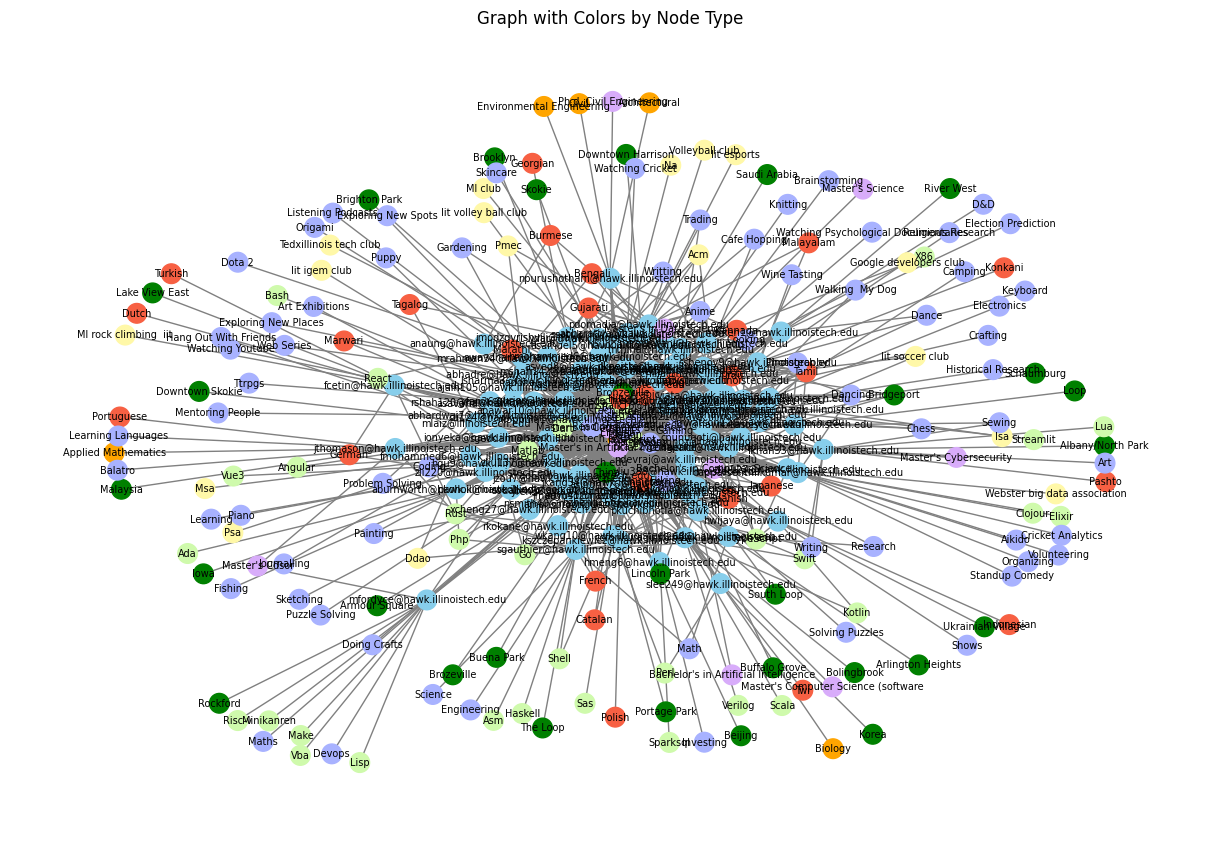

In [23]:


# Assign colors based on node type
color_map = []
for node in G.nodes(data=True):
    if node[1].get("type") == "student":
        color_map.append("skyblue")
    elif node[1].get("type") == "department":
        color_map.append("orange")
    elif node[1].get("type") == "neighborhood":
        color_map.append("green")
    elif node[1].get("type") == "computer_languages":
        color_map.append("#CFFAAC")
    elif node[1].get("type") == "languages_spoken":
        color_map.append("#F76043")
    elif node[1].get("type") == "degree_program":
        color_map.append("#D8ACFA")
    elif node[1].get("type") == "student_club":
        color_map.append("#FFF8A8")
    elif node[1].get("type") == "hobbies":
        color_map.append("#A8B2FF")
    else:
        color_map.append("gray")


plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42) 
nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=200, font_size=7, edge_color="gray")
plt.title("Graph with Colors by Node Type")
plt.show()

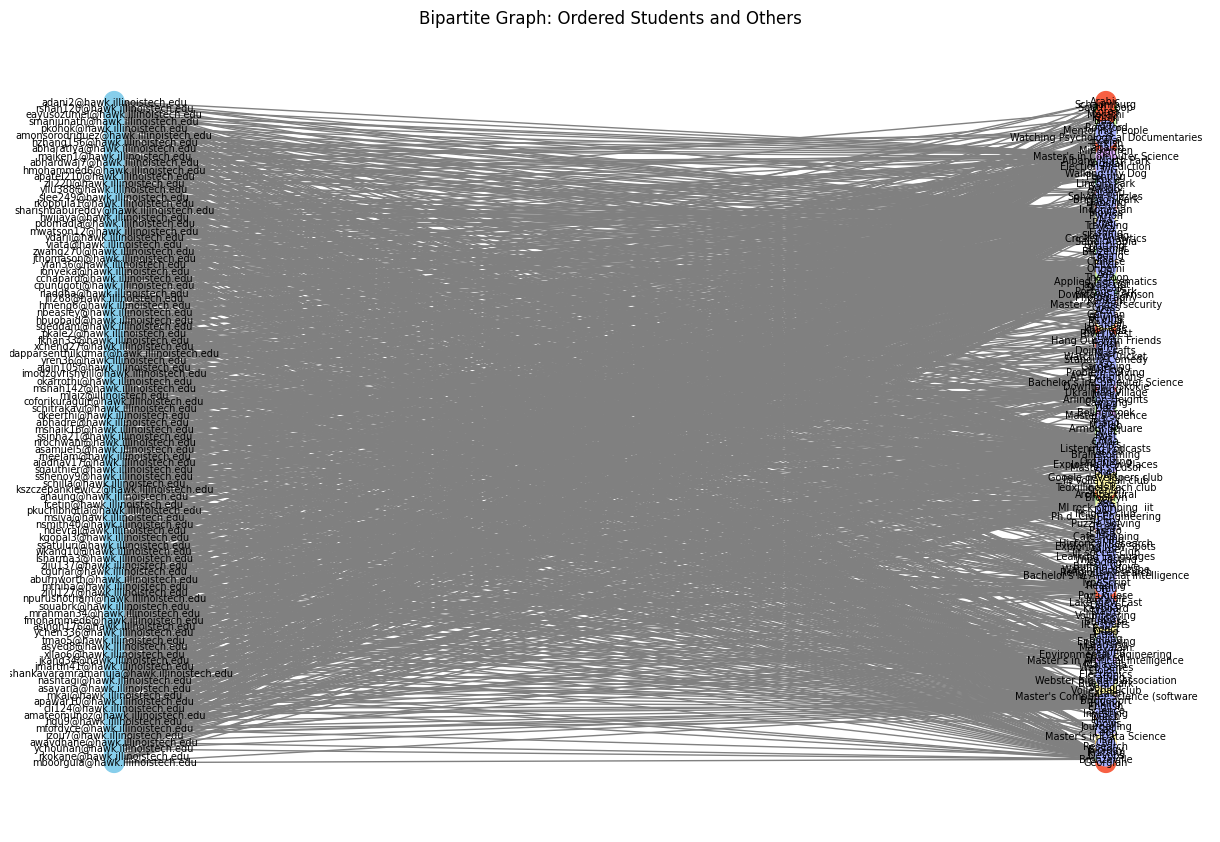

In [24]:
students = sorted([n for n, d in G.nodes(data=True) if d.get("type") == "student"])
others = sorted(set(G.nodes()) - set(students))


pos = bipartite_layout(G, students)

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=200, font_size=7, edge_color="gray")
plt.title("Bipartite Graph: Ordered Students and Others")
plt.show()



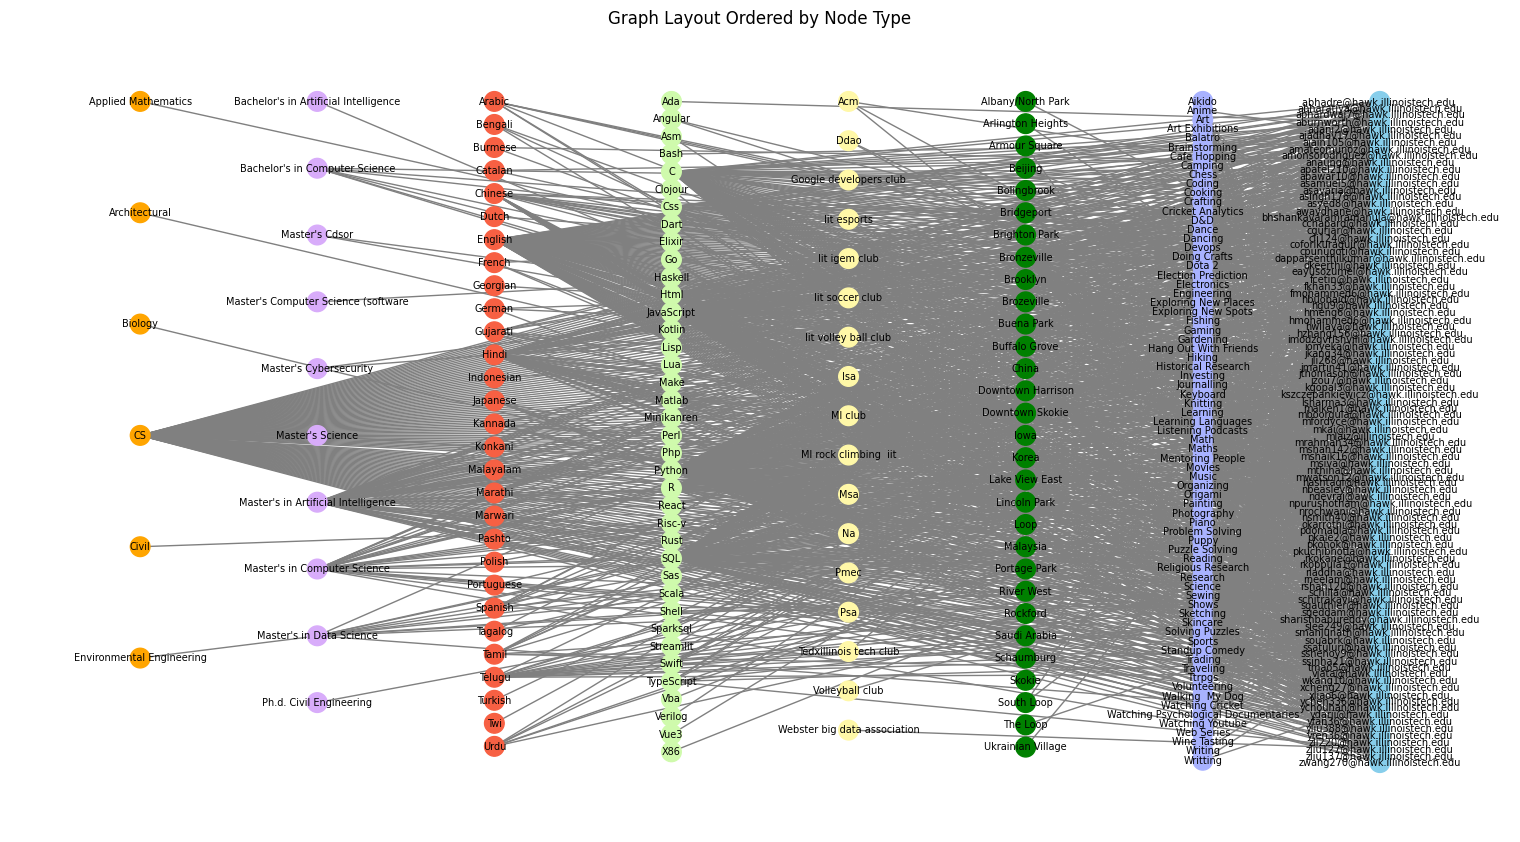

In [25]:
ordered_types = [
    "department",
    "degree_program",
    "languages_spoken",
    "computer_languages",
    "student_club",
    "neighborhood",
    "hobbies",
    "student"
]


pos = {}


x_step = 1 / max(1, len(ordered_types))

y_spacing = 0.9  

for i, node_type in enumerate(ordered_types):
    # Get nodes of this type, sorted alphabetically by node label for consistency
    nodes_of_type = sorted([n for n, d in G.nodes(data=True) if d.get("type") == node_type])
    count = len(nodes_of_type)
    
    # Vertical positions evenly spaced in [0, y_spacing]
    y_step = y_spacing / max(1, count)
    
    for j, node in enumerate(nodes_of_type):
        x = i * x_step
        y = j * y_step
        
        # Shift y to start at bottom-top centered if you want
        y = y_spacing - y
        
        pos[node] = (x, y)


plt.figure(figsize=(15, 8))
nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=200, font_size=7, edge_color="gray")
plt.title("Graph Layout Ordered by Node Type")
plt.show()



In [26]:



node_types = [d.get("type", "undefined") for _, d in G.nodes(data=True)]
type_counts = Counter(node_types)
df_node_summary = pd.DataFrame(type_counts.items(), columns=["Node Type", "Count"]).sort_values(by="Count", ascending=False)

print(df_node_summary)


            Node Type  Count
0             student     98
7             hobbies     73
3  computer_languages     38
2        neighborhood     30
4    languages_spoken     29
6        student_club     17
5      degree_program     10
1          department      6


In [27]:

# Collect nodes of target unimodal type
student_nodes = [n for n, d in G.nodes(data=True) if d.get("type") == "student"]

# Build a dictionary: attribute value -> list of students connected to it
attribute_to_students = defaultdict(set)

# For each student, check their neighbors (attributes)
for student in student_nodes:
    neighbors = G.neighbors(student)
    for attr in neighbors:
        if G.nodes[attr].get("type") != "student":
            attribute_to_students[attr].add(student)

# Create a new graph where students are connected if they share an attribute
G_unimodal = nx.Graph()
G_unimodal.add_nodes_from(student_nodes)
print(len(student_nodes))

# For each attribute, connect all students that share it
for attr, students_sharing in attribute_to_students.items():
    students_list = list(students_sharing)
    for i in range(len(students_list)):
        for j in range(i+1, len(students_list)):
            u, v = students_list[i], students_list[j]
            if G_unimodal.has_edge(u, v):
                # Optionally increment weight for multiple shared attributes
                G_unimodal[u][v]['weight'] += 1
            else:
                G_unimodal.add_edge(u, v, weight=1)


98


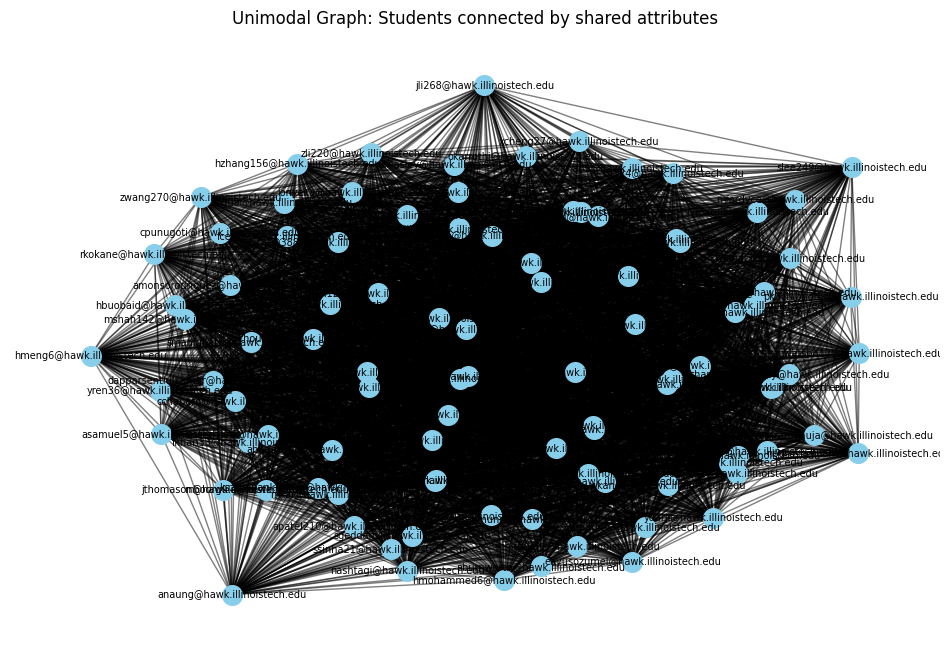

In [28]:


plt.figure(figsize=(12, 8))

# Use a layout suitable for unimodal graphs, e.g., spring_layout
pos = nx.spring_layout(G_unimodal, seed=42)

# Draw nodes
nx.draw_networkx_nodes(G_unimodal, pos, node_color="skyblue", node_size=200)

# Draw edges
nx.draw_networkx_edges(G_unimodal, pos, alpha=0.5)

# Draw node labels (emails or IDs)
nx.draw_networkx_labels(G_unimodal, pos, font_size=7)

plt.title("Unimodal Graph: Students connected by shared attributes")
plt.axis('off')  # Hide axis
plt.show()


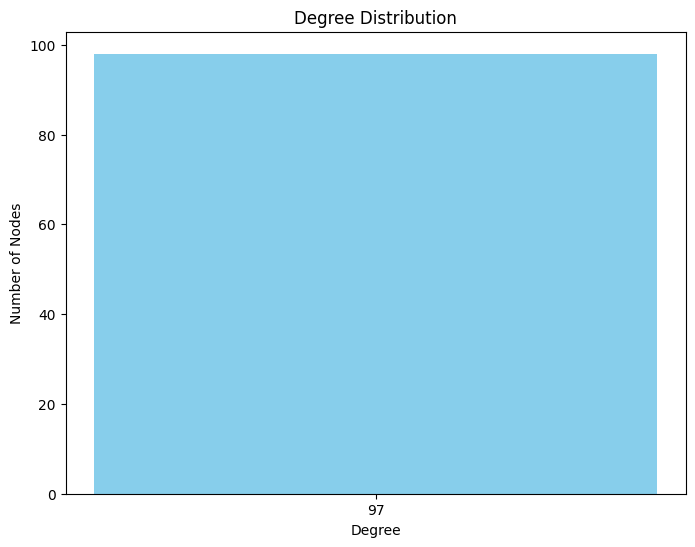

In [29]:


# Extract degrees of all nodes
degree_sequence = [d for n, d in G_unimodal.degree()]

# Count number of nodes per degree
degree_count = Counter(degree_sequence)
deg, cnt = zip(*sorted(degree_count.items()))

# Plot degree distribution
plt.figure(figsize=(8, 6))
plt.bar(deg, cnt, width=0.80, color='skyblue')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.xticks(deg)
plt.show()
